![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Interpolação, Regressão e Derivadas

Vimos que, ao usar interpolação polinomial com pontos igualmente espaçados,
a função fica bem melhor aproximada no centro do intervalo do que nas extremidades.
Nesta parte, veremos como estas técnicas poderiam ser usadas para aproximar as derivadas de uma função.

## Questão 1: Funções básicas

In [2]:
def interp(xs, ys):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys)."
    assert(len(xs) == len(ys))
    
    Vandermonde = []
    
    for x in xs:
        vetor = []
        for i in range(len(xs)):
            vetor.append(x**i)
        Vandermonde.append(vetor)

    return np.linalg.solve(Vandermonde,ys)

In [3]:
def regress(xs, ys, d):
    "Retorna os coeficientes do polinomio de grau  d  que aproxima, em mínimos quadrados, os pontos  (xs, ys)."
    
    # Retorna a matriz do sistema linear
    Matriz_resposta = []

    for xs in xs:
        linha = []
        for i in range(d+1):
           linha.append(xs**i)
        Matriz_resposta.append(linha)
    
    Matriz_resposta = np.array(Matriz_resposta)

    # Calcula os parâmetros para os dados (t_i, y_i), resolvendo o sistema linear
    M = Matriz_resposta
    ProdDireito = (M.T @ (M))
    ProdEsquerdo = M.T @ ys

    return np.linalg.solve(ProdDireito, ProdEsquerdo)

In [4]:
def polyval(coefs, t):
    "Calcula o valor do polinômio com coeficietes  coefs  (dados em ordem crescente) nos pontos t."    
    """ Método de Horner. Dados os coeficientes em ordem inversa, [a_n, ... a_1, a_0],
        retorna uma função que calcula o polinômio correspondente. """
    coefs = coefs[::-1]
    t = np.array(t)
    valor = coefs[0]

    for a in coefs[1:]:
        valor = valor*t + a
    
    return valor
    

In [5]:
assert np.allclose(polyval([1,2], [0,1,2,3]), [1,3,5,7])

In [6]:
assert np.allclose(polyval([1,0,1,2], [0,1,-1,1/2,3]), [1, 4, 0, 3/2, 64])

In [7]:
def derivada(coefs):
    "Retorna a lista dos coeficientes do polinômio que é a derivada do polinômio dados pelos coeficientes coefs."
    Dcoefs = []
    
    for coef, i in enumerate(coefs):
        Dcoefs.append(coef*(i))

    return Dcoefs[1:]

In [8]:
assert np.allclose(derivada([1,2,3,4,5]), [2,6,12,20])

## Questão 2: Erros de interpolação

Usando pontos igualmente espaçados,
podemos calular um polinômio $p_d$ de grau $d$ que interpola uma função $f$.
Ao derivar este polinômio, obtemos uma aproximação da derivada $f'$.

Vamos estudar como este método funciona para a função seno.

Faça, lado a lado (usando `subplots`),
o gráfico do erro cometido pelo polinômio de interpolação de grau 2 para a função seno no intervalo [0,3],
e o erro resultante de usar a derivada deste polinômio para aproximar a derivada.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


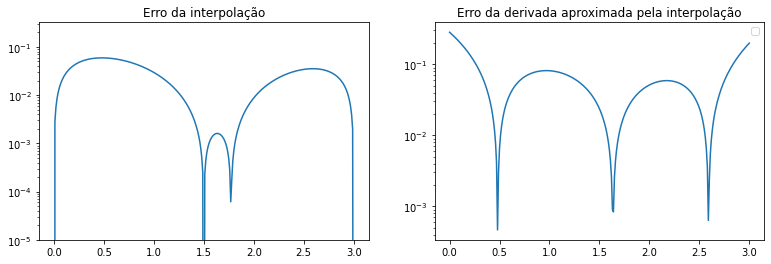

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

# YOUR CODE HERE
xs = np.linspace(0, 3, 3)
ys = np.sin(xs)

CoefsInterpola = interp(xs, ys)
CoefsInterpolaDerivado = derivada(CoefsInterpola)

ts = np.arange(0, 3.01, 0.01)

ValorSen = np.sin(ts)
ValorInter = polyval(CoefsInterpola,ts)
ax1.semilogy(ts, abs(ValorSen - ValorInter))
ax1.set_title('Erro da interpolação')
ax1.set_ylim(10e-6)

ValorCos = np.cos(ts)
ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
ax2.semilogy(ts, abs(ValorCos - ValorInterDer))
ax2.set_title('Erro da derivada aproximada pela interpolação')

fig = plt.gcf()

In [10]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10

Quem tem mais erro: a aproximação da função ou da derivada?
(Talvez você tenha que ajustar `ylim` para ver melhor o gráfico)

Ao que parece, no geral, a grandeza dos erros são parecidos, mas a derivada possui um pouco mais de erro, nos pontos de fronteira o erro da derivada aumenta consideravelmente. E nos pontos de interpolação o erro da derivada não vai a 0, como se esperaria.

## Questão 3: mais graus!

Faça também para os graus 4, 6 e 8.

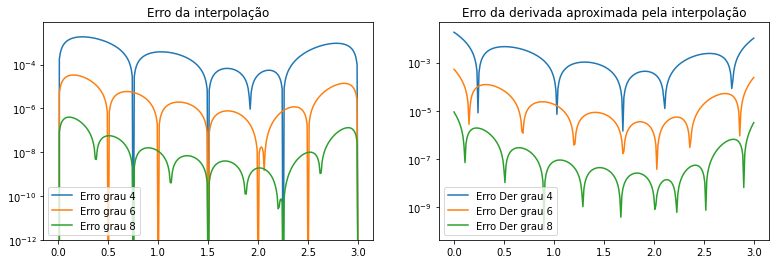

In [11]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

# YOUR CODE HERE
grau = [4, 6, 8]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()
    ax1.set_ylim(10e-13)

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro Der grau {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()
    

fig = plt.gcf()

In [12]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 3

In [13]:
for ax in fig.axes:
    assert len(ax.get_title()) >= 10
    assert len(ax.get_legend().texts) == 3

In [14]:
fig = None

O erro é maior para aproximar a função ou a derivada?  De quanto?

Os erros da derivada são claramente um pouco maior, principalmente quando vai se aproximando da fronteira do intervalo. Interessante tbm que o erro da derivada apresenta ser mais estável do que o erro da função

O erro da aproximação da derivada é maior no centro ou nas extremidades?  Isso é esperado?

É maior nas extremidades. Isso era esperado tendo em vista que o polinômio interpolador também piora indo pras extremidades. 
O ponto interessante são os pontos onde foi feita a interpolação, que claramente no polinomio em si o erro é 0, mas na sua derivada o erro segue o padrão normalmente, e quando se trata das extremidades interpoladas ele piora absurdamente.

### Outros graus

Faça agora com graus 3, 5, 7 e 9.

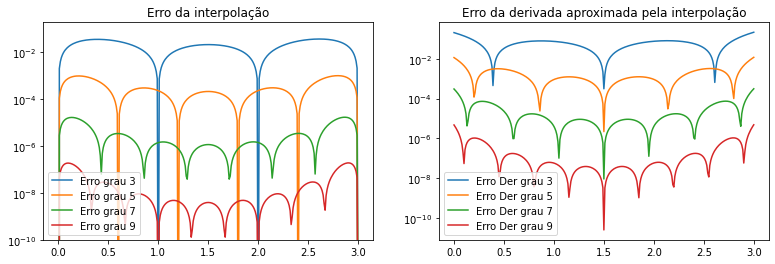

In [15]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

grau = [3, 5, 7, 9]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()
    ax1.set_ylim(10e-11)

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro Der grau {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()
    

fig = plt.gcf()

In [16]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

In [17]:
fig = None

Comente as diferenças e similaridades com o caso anterior.
O que você acha que aconteceu?

A primeira diferença notável é a periodicidade perfeita dos polinômios de grau ímpar, e isso claramente se deve ao fato da função seno ser uma função par, e quando pegamos uma quantidade pares de pontos pra descreve-lâ ajuda a entender a função, diferente de quando pegamos uma quantidade ímpar de pontos. 
(Perceba que os polinômios de graus pares precisam de uma quantidade ímpar de pontos para interpolar o polinômio, enquanto os polinômios impares usam uma quantidade par.)

## Questão 4: Erros de regressão

Calcule a função seno em 31 pontos igualmente espaçados no intervalo $[0,3]$,
e use-os para ajustar os polinômios de regressão de graus 2, 4, 6 e 8.

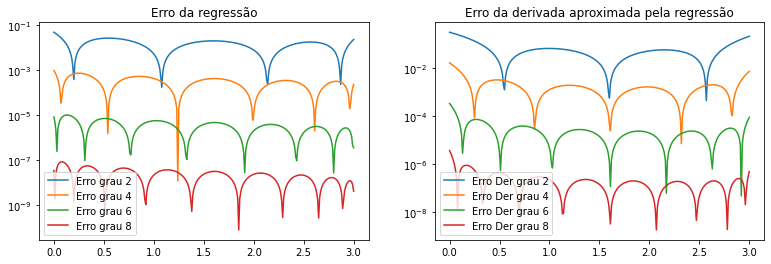

In [18]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

grau = [2, 4, 6, 8]
for i in grau:
    xs = np.linspace(0, 3, 31)
    ys = np.sin(xs)

    CoefsRegressao = regress(xs, ys, i)
    CoefsRegressaoDerivado = derivada(CoefsRegressao)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsRegressao,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da regressão')
    ax1.legend()

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsRegressaoDerivado,ts)
    
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro Der grau {i}')
    ax2.set_title('Erro da derivada aproximada pela regressão')
    ax2.legend()
    

fig = plt.gcf()

In [19]:
assert len(fig.axes) == 2
for ax in fig.axes:
    assert len(ax.lines) == 4

Compare os erros de ajuste da função (seno), entre este método e o uso dos polinômios interpoladores.

Observando os erros, é possível perceber que os erros da regressão são mais consistentes.
E os erros da regressão é um pouco maior, mas são pequenas diferenças.

Compare os erros de ajuste das derivadas.

Agora olhando para a derivada temos as mesmas coisas. Mais consistência nos erros, e o erro da regressão é um pouco maior.

## Questão 5: Derivadas centrais

Qual seria o tamanho do passo necessário para calcular uma aproximação da derivada usando a derivada central,
de forma a obter um erro comparável com ajuste do polinômio de grau 2? E de grau 4?

Faça os cálculos abaixo, indicando **como você chegou nestes valores**.

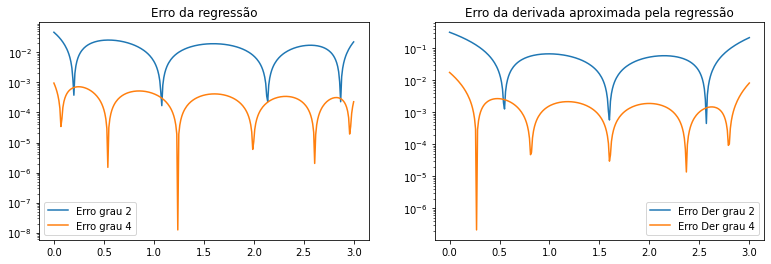

In [20]:
# YOUR CODE HERE

def derivada_central(f, x, h=1e-7):
    numerador = f(x+h) - f(x-h)
    denominador = 2*h
    return numerador/denominador


def polinomio(coeficientes):
    """Retorna uma função com base nos coeficientes dados.
    float -> def"""
    def p(x):
        return polyval(coeficientes, x)
    
    return lambda x: p(x)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

graus = [2, 4]
hs = [6e-2, 6e-2]
for grau, h in zip(graus, hs):

    xs = np.linspace(0, 3, 31)
    ys = np.sin(xs)

    CoefsRegressao = regress(xs, ys, grau)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsRegressao,ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {grau}')
    ax1.set_title('Erro da regressão')
    ax1.legend()

    ValorCos = np.cos(ts)
    PolinomioDerivado = polinomio(CoefsRegressao)
    ValorInterDer = derivada_central(PolinomioDerivado, ts, h)

    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro Der grau {grau}')
    ax2.set_title('Erro da derivada aproximada pela regressão')
    ax2.legend()
    

fig = plt.gcf()

Agora, faça o ajuste dos polinômios de grau 12, 14 e 16, por interpolação, no intervalo $[0,3]$.



Erro da interpolação grau 12: 3.80631727525671e-10
Erro da derivada interpolação grau 12: 6.0462502898253265e-09


Erro da interpolação grau 14: 1.393968274143731e-12
Erro da derivada interpolação grau 14: 2.5192031295230566e-11


Erro da interpolação grau 16: 8.3396831107585e-14
Erro da derivada interpolação grau 16: 1.489375788497893e-12


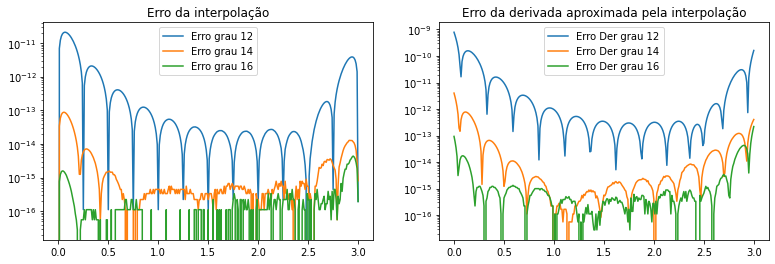

In [21]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

grau = [12, 14, 16]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola,ts)
    Erro1 = abs(ValorSen - ValorInter)

    ax1.semilogy(ts, Erro1, label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()

    ValorCos = np.cos(ts)
    ValorInterDer = polyval(CoefsInterpolaDerivado,ts)
    Erro2 = abs(ValorCos - ValorInterDer)

    ax2.semilogy(ts, Erro2, label=f'Erro Der grau {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()
    print(f'\n\nErro da interpolação grau {i}: {np.sum(Erro1)}')
    print(f'Erro da derivada interpolação grau {i}: {np.sum(Erro2)}')
fig = plt.gcf()

Qual a magnitude do erro que você obtém para a derivada, no intervalo $[0,3]$?

Magnitude do erro da derivada:

Grau 12: 10^-9
Grau 14: 10^-11
Grau 16: 10^-12

Qual seria o passo no método das derivadas centrais para obter esse erro?

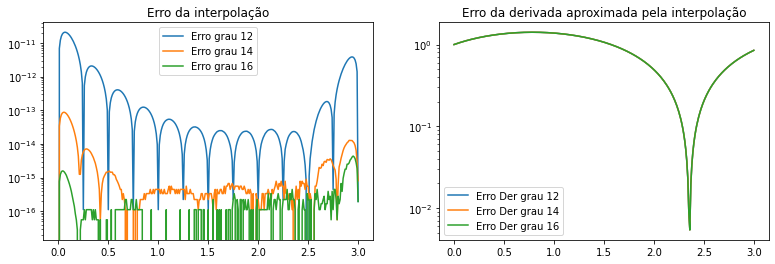

In [22]:
# YOUR CODE HERE
def derivada_central(f, x, h=1e-7):
    numerador = f(x+h) - f(x-h)
    denominador = 2*h
    return numerador/denominador


def polinomio(coeficientes):
    """Retorna uma função com base nos coeficientes dados.
    float -> def"""
    def p(x):
        return polyval(coeficientes, x)
    
    return lambda x: p(x)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

grau = [12, 14, 16]
for i in grau:
    xs = np.linspace(0, 3, i+1)
    ys = np.sin(xs)

    CoefsInterpola = interp(xs, ys)
    CoefsInterpolaDerivado = derivada(CoefsInterpola)

    ts = np.arange(0, 3.01, 0.01)

    ValorSen = np.sin(ts)
    ValorInter = polyval(CoefsInterpola, ts)
    ax1.semilogy(ts, abs(ValorSen - ValorInter), label=f'Erro grau {i}')
    ax1.set_title('Erro da interpolação')
    ax1.legend()

    ValorCos = np.cos(ts)
    PolinomioDerivado = polinomio(CoefsInterpolaDerivado)
    ValorInterDer = derivada_central(PolinomioDerivado, ts, h=1e-2)
    ax2.semilogy(ts, abs(ValorCos - ValorInterDer), label=f'Erro Der grau {i}')
    ax2.set_title('Erro da derivada aproximada pela interpolação')
    ax2.legend()


fig = plt.gcf()

Comente

YOUR ANSWER HERE

# Parte 2: Interpolação com derivadas

Suponha que, além dos valores $y_i = f(x_i)$, também possuímos $z_i = f'(x_i)$.
Deveríamos ser capazes de calcular melhores polinômios interpoladores!

## Questão 6: Equações

Suponha que são dados apenas 2 pontos.
- Quais equações os coeficientes do polinômio devem satisfazer?
- Qual o grau deste polinômio?
- A matriz deste sistema é inversível?

Sabendo as derivadas nos pontos dados, podemos melhorar o grau do polinômio interpolador tendo a mesma quantidade de pontos.

$\begin{bmatrix}
1 & x_1 & x^2_1 & x^3_1\\
0 & 1   & 2x_1  & x^3_1\\
1 & x_2 & x^2_2 & x^3_2\\
0 & 1   & 2x_2  & x^3_2
\end{bmatrix}$

Se antes com 2 pontos formaríamos um polinômio de grau 1, agora conseguimos formar um polinômio interpolador de grau 3.


Mais a frente percebemos que montar a matriz dessa forma não é a maneira mais eficiente. Colocando primeiro as equações do polinômio normal, depois as equações das derivadas podemos pensar na matriz total em blocos.

No caso geral, quais são as novas equações que os coeficientes $p_i$ devem satisfazer?

São equações das derivadas do polinômio interpolador.
Então se antes com 1 ponto tinhamos 1 equação agora pra 1 ponto temos 2 equações. 

Escreva a função `matrix_der(xs,d)` que calcula a matriz que multiplica estes coeficientes,
(nas novas equações)
em função dos pontos `xs` onde sabemos as derivadas e do grau `d` que o polinômio terá.

(Essa função é análoga à função que constrói a matriz para a interpolação e regressão)

In [23]:
def matrix_der(xs, d):
    xs = np.asarray(xs, dtype=float)
    # YOUR CODE HERE
    matriz = []
    for x in xs:
        linha = [0]
        for i in range(0, d):
            linha.append((i+1)*x**i)
            
        matriz.append(linha)
    
    return matriz

In [24]:
M1 = matrix_der([1,2,3], 3)
ans = [[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  4., 12.],
       [ 0.,  1.,  6., 27.]]
assert np.allclose(M1, ans)

In [25]:
M1 = matrix_der([1,2,3,4,5], 3)
assert np.shape(M1) == (5,4)

In [26]:
M1 = matrix_der([1,2,3,4,5], 8)
assert np.shape(M1) == (5,9)

## Questão 7: Resolvendo o sistema

Para construir matrizes e vetores em "blocos", você pode usar `np.hstack`, `np.vstack` e/ou `np.block`.

In [27]:
def vandermonde(xs):
    "Retorna a matriz de vandermonde"
    
    Vandermonde = []
    
    for x in xs:
        vetor = []
        for i in range(2*len(xs)):
            vetor.append(x**i)
        Vandermonde.append(vetor)

    return Vandermonde

In [28]:
def interp1(xs, ys, zs):
    "Retorna os coeficientes do polinomio interpolador para os pontos  (xs, ys), com respectivas derivadas zs."
    assert (len(xs) == len(ys) == len(zs))
    
    Vandermonde = vandermonde(xs)
    Derivadas = matrix_der(xs, 2*len(xs)-1)

    MatrixFull = np.vstack((Vandermonde, Derivadas))
    DireitaFull = np.hstack((ys, zs)).T

    resposta = np.linalg.solve(MatrixFull, DireitaFull)
    
    return resposta.T

In [29]:
coefs = interp1([0], [1], [1])
assert np.allclose(coefs, [1,1])

In [30]:
coefs = interp1([1], [1], [1])
assert np.allclose(coefs, [0,1])

Explique a resposta dos dois `assert`s acima (analiticamente)

Os asserts verificam se o código funciona. Passando os valores de x, y e z, e já sabendo dos valores corretos ele faz todo algoritmo estabelecido pela função.
O algoritmo trabalha em blocos, ele cria uma matriz parecida com a de vandermonde, depois cria a matriz derivada. Usa o vstack para juntar os blocos, usa o hstack para juntar os ys e zs.

In [31]:
coefs = interp1([0,1], [1,1], [1,1])
assert np.allclose(coefs, [1,1,-3,2])

In [32]:
xs = np.array([0,1.0])
ys = np.array([1,3.0])
zs = np.array([1,1.0])
coefs = interp1(xs, ys, zs)
assert np.allclose(coefs, [1,1,3,-2])

Explique porque os coeficientes de grau 0 e 1 são os mesmos de só fazer a interpolação no zero.

## Questão 8: Erro

O erro decai conforme aumentamos o número de pontos?
Teste para as funções $f(x) = \cos(x)$ e $g(x) = e^x$ no intervalo $[-1, 2]$.

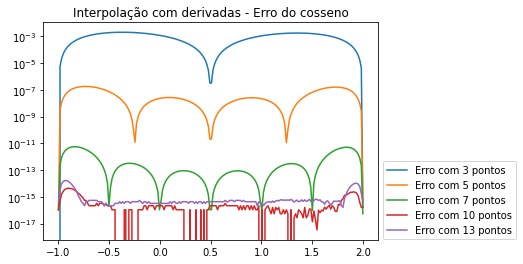

In [33]:
# Gráficos de erro para o cosseno
# YOUR CODE HERE
pontos = [3, 5, 7, 10, 13]
for ponto in pontos:
    xs = np.linspace(-1, 2, ponto)
    ys = np.cos(xs)
    zs = -np.sin(xs)
    ts = np.linspace(-1, 2, 200)

    CoefInterpola = interp1(xs, ys, zs)
    ValorInterpola = polyval(CoefInterpola, ts)
    ValorFunção = np.cos(ts)

    plt.semilogy(ts, abs(ValorFunção - ValorInterpola), label=f'Erro com {ponto} pontos')
    plt.legend(bbox_to_anchor = (1.0, 0.385))
    plt.title('Interpolação com derivadas - Erro do cosseno')

ax = plt.gca()

In [34]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

In [35]:
ax = None

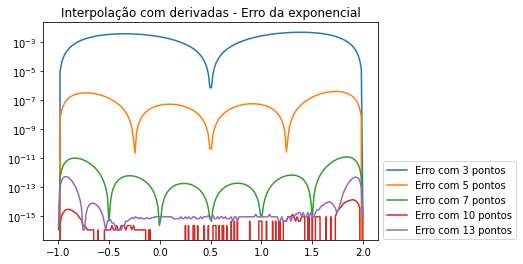

In [36]:
# Gráficos de erro para a função exponencial
# YOUR CODE HERE
pontos = [3, 5, 7, 10, 13]
for ponto in pontos:
    xs = np.linspace(-1, 2, ponto)
    ys = np.exp(xs)
    zs = np.exp(xs)
    ts = np.linspace(-1, 2, 200)

    CoefInterpola = interp1(xs, ys, zs)
    ValorInterpola = polyval(CoefInterpola, ts)
    ValorFunção = np.exp(ts)

    plt.semilogy(ts, abs(ValorFunção - ValorInterpola), label=f'Erro com {ponto} pontos')
    plt.legend(bbox_to_anchor = (1.0, 0.385))
    plt.title('Interpolação com derivadas - Erro da exponencial')

ax = plt.gca()

In [37]:
assert len(ax.get_title()) >= 10
assert len(ax.lines) >= 5

## Questão 9: Comparando

Há duas formas de obter um polinômio de grau 9 para interpolar a função cosseno:
- calcular a função em 10 pontos igualmente espaçados;
- calcular a função e sua derivada em 5 pontos igualmente espaçados.

Faça um gráfico dos erros, no interalo $[-1,2]$, para cada um destes polinômios.

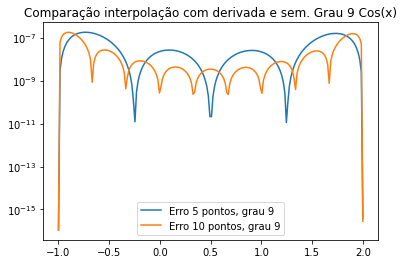

In [38]:
# YOUR CODE HERE
xs = np.linspace(-1, 2, 5)
ys = np.cos(xs)
zs = -np.sin(xs)
ts = np.linspace(-1, 2, 200)

CoefInterpola = interp1(xs, ys, zs)
ValorInterpola = polyval(CoefInterpola, ts)
ValorFunção = np.cos(ts)

erro5 = abs(ValorFunção - ValorInterpola)

plt.semilogy(ts, erro5, label=f'Erro 5 pontos, grau 9')
plt.legend(bbox_to_anchor = (1.0, 0.385))
plt.title('Comparação interpolação com derivada e sem. Grau 9 Cos(x)')

xs = np.linspace(-1, 2, 10)
ys = np.cos(xs)

CoefsInterpola = interp(xs, ys)
ValorInterpola = polyval(CoefsInterpola,ts)

erro10 = abs(ValorFunção - ValorInterpola)

plt.semilogy(ts, erro10, label=f'Erro 10 pontos, grau 9')
plt.legend()

Para termos uma medida quantitativa,
calcule a soma dos valores absolutos dos erros,
para vários pontos ao longo do intervalo $[-1,2]$

In [39]:
ErroSemDerivada = np.sum(erro10)
ErroComDerivada = np.sum(erro5)

print(f'O erro usando a derivada para obter o polinômio interpolador de grau 9 é de : {ErroComDerivada}')
print(f'O erro sem usar a derivada para obter o polinômio interpolador de grau 9 é de : {ErroSemDerivada}')

if ErroComDerivada < ErroSemDerivada:
    print(f'Logo o melhor método é usando a derivada.')
else:
    print(f'Logo o melhor método é sem usar a derivada.')

O erro usando a derivada para obter o polinômio interpolador de grau 9 é de : 9.501145392519506e-06
O erro sem usar a derivada para obter o polinômio interpolador de grau 9 é de : 5.327191078173532e-06
Logo o melhor método é sem usar a derivada.


Faça o mesmo estudo para polinômios de grau 7, 11 e 15.



O erro usando a derivada para obter o polinômio interpolador de grau 7 é de : 0.0006739851631399861
O erro sem usar a derivada para obter o polinômio interpolador de grau 7 é de : 0.0015621777977261955
Logo o melhor método é usando a derivada.


O erro usando a derivada para obter o polinômio interpolador de grau 11 é de : 3.2084355873485126e-08
O erro sem usar a derivada para obter o polinômio interpolador de grau 11 é de : 4.57136453482776e-08
Logo o melhor método é usando a derivada.


O erro usando a derivada para obter o polinômio interpolador de grau 15 é de : 7.169369264925507e-13
O erro sem usar a derivada para obter o polinômio interpolador de grau 15 é de : 6.225298054829409e-13
Logo o melhor método é sem usar a derivada.


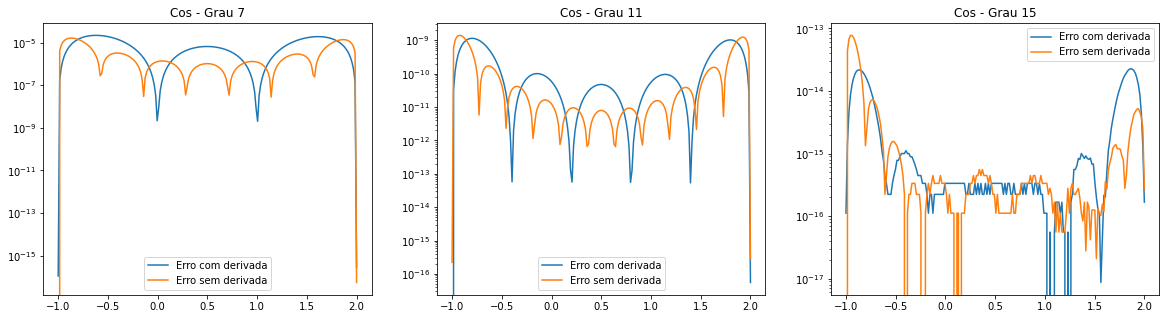

In [40]:
# YOUR CODE HERE
graus = [7, 11, 15]
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
for grau, ax in zip(graus, axs):
    ponto = (grau+1)/2

    xs = np.linspace(-1, 2, int(ponto))
    ys = np.cos(xs)
    zs = -np.sin(xs)
    ts = np.linspace(-1, 2, 200)

    CoefInterpola = interp1(xs, ys, zs)
    ValorInterpola = polyval(CoefInterpola, ts)
    ValorFunção = np.cos(ts)

    erroComDerivada = abs(ValorFunção - ValorInterpola)

    ax.semilogy(ts, erroComDerivada, label=f'Erro com derivada')
    ax.legend(bbox_to_anchor = (1.0, 0.385))
    ax.set_title(f'Cos - Grau {grau}')

    xs = np.linspace(-1, 2, grau+1)
    ys = np.cos(xs)

    CoefsInterpola = interp(xs, ys)
    ValorInterpola = polyval(CoefsInterpola,ts)

    erroSemDerivada = abs(ValorFunção - ValorInterpola)

    ax.semilogy(ts, erroSemDerivada, label=f'Erro sem derivada')
    ax.legend()

    ErroSemDerivada = np.sum(erroComDerivada)
    ErroComDerivada = np.sum(erroSemDerivada)

    print(f'\n\nO erro usando a derivada para obter o polinômio interpolador de grau {grau} é de : {ErroComDerivada}')
    print(f'O erro sem usar a derivada para obter o polinômio interpolador de grau {grau} é de : {ErroSemDerivada}')

    if ErroComDerivada < ErroSemDerivada:
        print(f'Logo o melhor método é usando a derivada.')
    else:
        print(f'Logo o melhor método é sem usar a derivada.')

O que você observa?

Observando pode-se constatar que na maioria dos casos a derivada realmente auxília a melhoria da interpolação. Mas, nem sempre, no uso de graus absurdos como o 15, o que possui o menor erro é sem o uso de derivadas.

Refaça para a função exponencial, com vários graus.



O erro usando a derivada para obter o polinômio interpolador de grau 7 é de : 0.0014246643402528458
O erro sem usar a derivada para obter o polinômio interpolador de grau 7 é de : 0.003355184212528284
Logo o melhor método é usando a derivada.


O erro usando a derivada para obter o polinômio interpolador de grau 11 é de : 6.517836531605425e-08
O erro sem usar a derivada para obter o polinômio interpolador de grau 11 é de : 9.353917657106692e-08
Logo o melhor método é usando a derivada.


O erro usando a derivada para obter o polinômio interpolador de grau 15 é de : 1.3113399255360036e-12
O erro sem usar a derivada para obter o polinômio interpolador de grau 15 é de : 1.1577960812303445e-12
Logo o melhor método é sem usar a derivada.


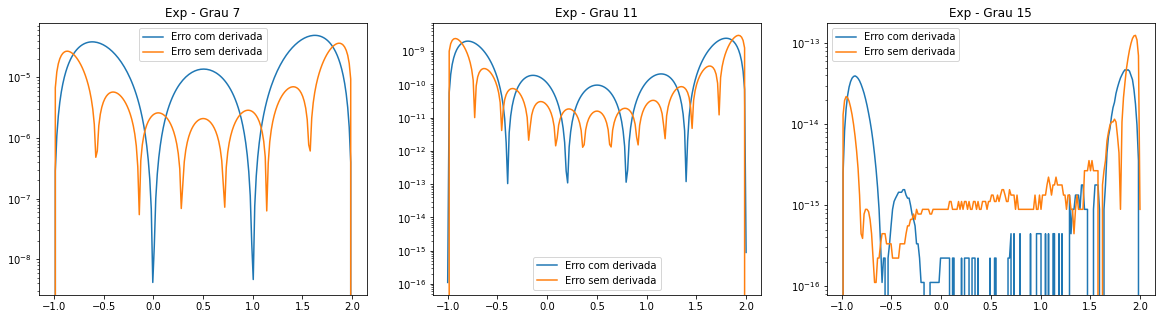

In [41]:
# YOUR CODE HERE
graus = [7, 11, 15]
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
for grau, ax in zip(graus, axs):
    ponto = (grau+1)/2

    xs = np.linspace(-1, 2, int(ponto))
    ys = np.exp(xs)
    zs = np.exp(xs)
    ts = np.linspace(-1, 2, 200)

    CoefInterpola = interp1(xs, ys, zs)
    ValorInterpola = polyval(CoefInterpola, ts)
    ValorFunção = np.exp(ts)

    erroComDerivada = abs(ValorFunção - ValorInterpola)

    ax.semilogy(ts, erroComDerivada, label=f'Erro com derivada')
    ax.legend(bbox_to_anchor = (1.0, 0.385))
    ax.set_title(f'Exp - Grau {grau}')

    xs = np.linspace(-1, 2, grau+1)
    ys = np.exp(xs)

    CoefsInterpola = interp(xs, ys)
    ValorInterpola = polyval(CoefsInterpola,ts)

    erroSemDerivada = abs(ValorFunção - ValorInterpola)

    ax.semilogy(ts, erroSemDerivada, label=f'Erro sem derivada')
    ax.legend()

    ErroSemDerivada = np.sum(erroComDerivada)
    ErroComDerivada = np.sum(erroSemDerivada)

    print(f'\n\nO erro usando a derivada para obter o polinômio interpolador de grau {grau} é de : {ErroComDerivada}')
    print(f'O erro sem usar a derivada para obter o polinômio interpolador de grau {grau} é de : {ErroSemDerivada}')

    if ErroComDerivada < ErroSemDerivada:
        print(f'Logo o melhor método é usando a derivada.')
    else:
        print(f'Logo o melhor método é sem usar a derivada.')

O que você viu no caso do cosseno se mantém aqui?
Porque você acha que isso aconteceu?

Sim, em ambos os casos o uso da derivada ajuda a diminuir o erro. Mas nos graus maiores atrapalha, e provavelmente isso se deve a ele alcançar os erros de truncamento primeiro.